# Example Notebook: fLEM with MFD and SFD

I will explore how sediment the morphorolgy varies as function of the routing algorithm used. I will look at the node-to-node distributed (MFD) and the node-to-node steepest descent (SFD) change the model landscape (parts c and d) in the image below.

![title](images/MFDandSFD.png)

In [1]:
import os,sys
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
# flem is up the directory tree so until the is Pypy installable this hack will have to do.
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from flem import initialise, solve_flem

### Model setup

The intial condition will be taken from a region near the north of the Khovskol Lake in northern in Mongolia.

![title](images/mongolia.png)

This is done by selecting the coordinates in the ```bounds```. The resolution is set along the $x$ axis, and the model domain is then created from the function ```intialise```.

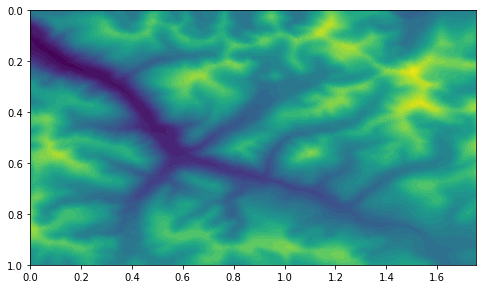

In [2]:
# Domain dimensions
dem = 1
bounds = [98.685, 51.208, 98.911, 51.337]
res = 128
model_space, u_n, mesh, V, bc = initialise(dem, bounds, res)

from fenics import plot
plt.figure(figsize=(8, 8))
pl2 = plot(u_n)
plt.gca().invert_yaxis()
plt.show()

### Distributed flow (MFD)

The first model has multiple flow directions.

In [3]:
# Physical parameters
physical_space = [1e+0,1e-5,1.5,1,1e-4] # [kappa, c, nexp, alpha, U]

# 0 = MFD node-to-node; 1 = MFD cell-to-cell; 2 = SD node-to-node; 3 = SD cell-to-cell
flow = 0

# Time
dt = 1e4
num_steps = 20

# Output
out_time = 10

# Plot stuff
plot = 0

# Calculate valley to valley wavelength
statistics = 0

In [4]:
name = 'mongolia'
dirtest = './%s/' % name
directory = os.path.dirname(dirtest)
if not os.path.exists(directory) :
  os.makedirs(directory)

In [5]:
[sed_flux, time, wavelength] = solve_flem(model_space,physical_space,flow,u_n, mesh, V, bc,dt,num_steps,out_time,plot,statistics,name)

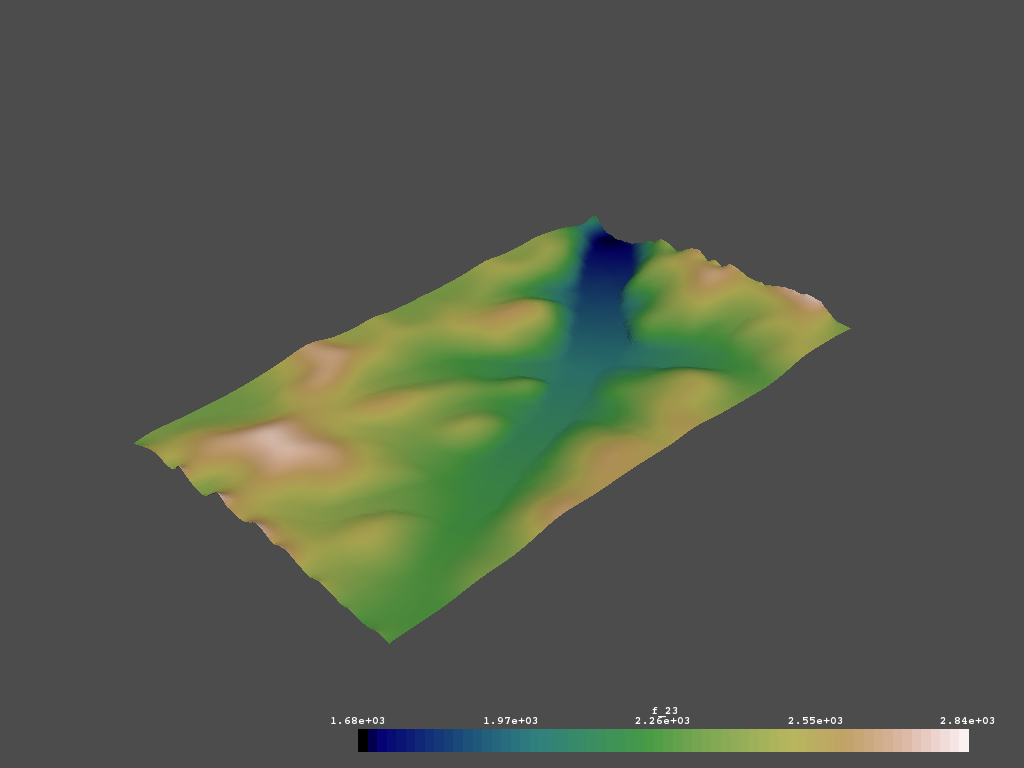

In [6]:
elevation = pv.read('mongolia/u_solution_128_19000000.vtu') # why such a big number?
warp = elevation.warp_by_scalar(factor=1e-4)
warp.plot(cmap='gist_earth', show_scalar_bar=True, notebook=True)

Plot the water flux within the model landscape.

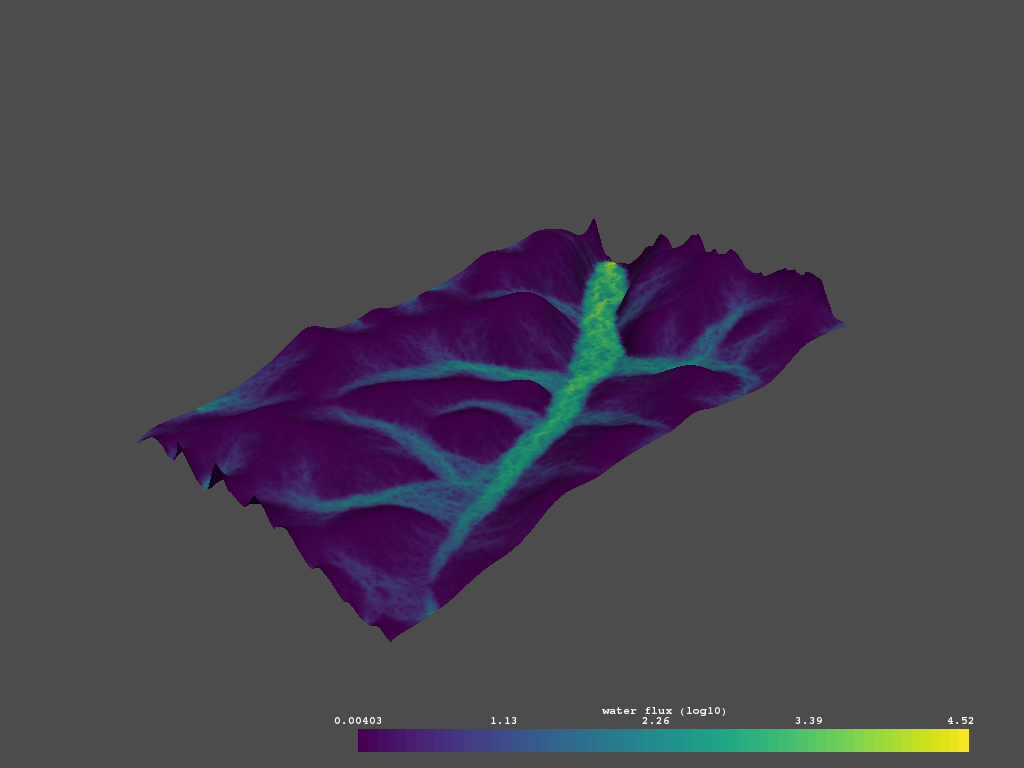

In [7]:
data = pv.read('mongolia/q_solution_128_19000000.vtu')
data['water flux (log10)'] = np.log10(data['f_346'])
data['elevation'] = elevation['f_23']
warp = data.warp_by_scalar(scalars='elevation',factor=2.5e-4)
warp.plot(scalars='water flux (log10)', cmap='viridis', show_scalar_bar=True, notebook=True, screenshot='pretty.png')

## Steepest descent (SFD)

Now with SFD.

In [8]:
flow = 2
[sed_flux, time, wavelength] = solve_flem(model_space,physical_space,flow,u_n, mesh, V, bc,dt,num_steps,out_time,plot,statistics,name)

In [9]:
data = pv.read('mongolia/q_solution_128_19000000.vtu')
data['water flux (log10)'] = np.log10(data['f_346'])
data['elevation'] = elevation['f_23']
warp = data.warp_by_scalar(scalars='elevation',factor=2.5e-4)
warp.plot(scalars='water flux (log10)', cmap='viridis', show_scalar_bar=True, notebook=True, screenshot='pretty.png')

AttributeError: 'NoneType' object has no attribute 'log10'

In [ ]:
data = pv.read('mongolia/q_solution_128_19000000.vtu')
